In [4]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("C:/Users/Radwa/Downloads/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
# view missing value count for each feature
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [8]:
#print number of duplicates
df.duplicated().sum()

0

In [9]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


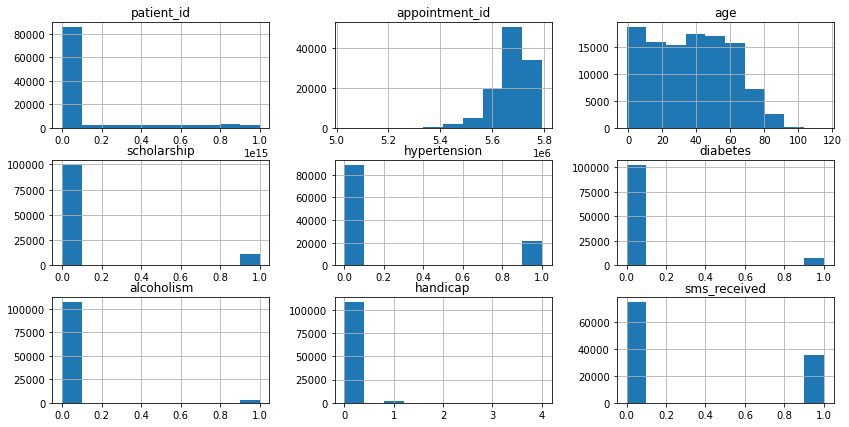

In [11]:
df.hist(figsize=(14,7));

# Basic observations and findings
1- no null values in the dataset as well as no duplicates
2- data type of both scheduled_date and appointment_date should be datetime
3- in my point of view the dependent value that we are interested in the no-show column, so we will go through its relation with other variables.

In [12]:
#2
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  float64       
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What is the percentage of people who didn't show up?

In [21]:
def noshow (d):
    return len(d.query('no_show == \'Yes\''))
no_of_show=df.shape[0]- noshow(df)
print(no_of_show)

def percentage_no_show  (d):
    return int (round(noshow(d)/d.shape[0]*100))


88208


20% of appointments were missed.


Text(0, 0.5, 'count')

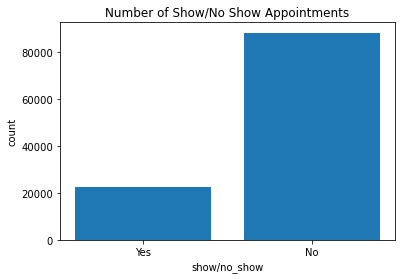

In [24]:
no_of_show=df.shape[0]-noshow(df)
percentage_noshow=int (round(no_of_noshow/no_of_rows*100))
print('{}% of appointments were missed.'.format(percentage_no_show(df)))

plt.bar(['Yes', 'No'],[noshow(df),no_of_show])
plt.title("Number of Show/No Show Appointments")
plt.xlabel('show/no_show')
plt.ylabel('count')



From the bar plot, we notice that the number of patients who have not show up during their scheduled meical appointments is very less than who show up. also 20% of appointments were missed.


Is there a raltionship between the gender and no-show appointments?

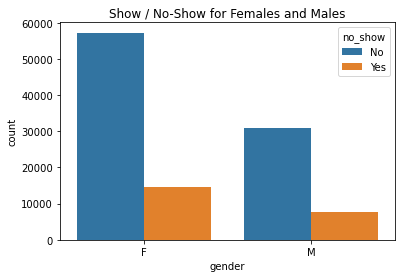

In [49]:
a=sns.countplot(data=df, x='gender', hue='no_show')
a.set_title('Show / No-Show for Females and Males')
plt.show()

In [42]:
df_gender=df['no_show'].groupby(df['gender']).value_counts()
df_gender

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [53]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

20.31458797327394 79.68541202672606


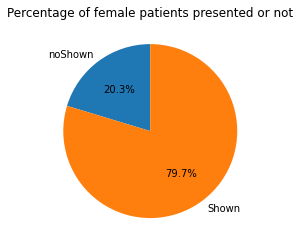

In [61]:
per_female_noshow=(14594/ 71840)*100
per_female_show=(57246/71840)*100
print(per_female_noshow,per_female_show)

y=np.array([per_female_noshow,per_female_show])
mylabels=['noShown', 'Shown']
plt.pie(y,labels=mylabels,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of female patients presented or not')
plt.show()



19.967947889471915 80.03205211052808


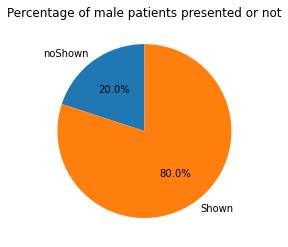

In [62]:
per_male_noshow=(7725/ 38687)*100
per_male_show=(30962/38687)*100
print(per_male_noshow,per_male_show)

y=np.array([per_male_noshow,per_male_show])
mylabels=['noShown', 'Shown']
plt.pie(y,labels=mylabels,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of male patients presented or not')
plt.show()


Is there a relationship between alcoholic males patients and the percentage of no show of them

In [32]:
df_males_alcoholic=df['alcoholism'].groupby(df['gender']).value_counts()
df_males_alcoholic

gender  alcoholism
F       0             70617
        1              1223
M       0             36550
        1              2137
Name: alcoholism, dtype: int64

In [27]:
df_males_noshow=df['gender'].groupby(df['no_show']).value_counts()
df_males_noshow

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64

28 473


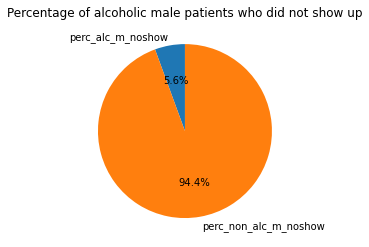

In [33]:
perc_alc_m_noshow=int (round(2137/7725*100))
perc_non_alc_m_noshow=int (round(36550/7725*100))
print(perc_alc_m_noshow,perc_non_alc_m_noshow)

y=np.array([perc_alc_m_noshow,perc_non_alc_m_noshow])
mylabels=['perc_alc_m_noshow', 'perc_non_alc_m_noshow']
plt.pie(y,labels=mylabels,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of alcoholic male patients who did not show up')
plt.show()




conclusion
- there is about 20% of appointments were missed
- percentage of females didn't show is higher than males who didn't show
- percentage of alcoholic males who didn't show up is more lower than alcoholic males who show up
- the data doesn't have nulls or suplicated values
limitation here is that there is no much factors that have significant effect on the absence of the patients on their appointments.
